In [5]:
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F 

In [6]:
import pandas as pd
sample = "../dataset/train/train_sent_emo.csv"
df = pd.read_csv(sample)
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [7]:
df['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [8]:
df['Emotion'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

In [10]:

print(torchaudio.list_audio_backends())

['soundfile']


In [4]:

video_file = "../dataset/train/train_splits/dia0_utt0.mp4"
print(os.path.exists(video_file))
waveform, sr = torchaudio.load(video_file)
transform = T.MelSpectrogram(sr)
mel = transform(waveform)
mel.shape, sr

True


LibsndfileError: Error opening '../dataset/train/train_splits/dia0_utt0.mp4': Format not recognised.

In [27]:
amp_to_db = T.AmplitudeToDB()
mel_db = amp_to_db(mel)
mel_db.shape

torch.Size([2, 128, 1362])

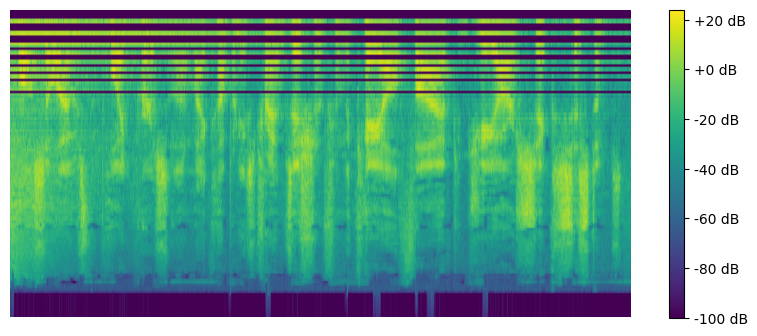

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.imshow(mel_db[1].numpy(), cmap='viridis', aspect='auto')
plt.axis('off')
plt.colorbar(format='%+2.0f dB')
plt.show();

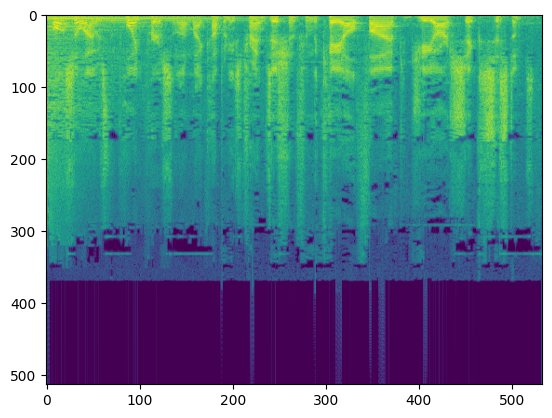

In [29]:
spectrogram = T.Spectrogram(n_fft=1024, win_length=None, hop_length=512, power=2.0)
spectrogram_db = amp_to_db(spectrogram(waveform))
plt.imshow(spectrogram_db[1].numpy(), cmap='viridis', aspect='auto');

In [30]:
import torchcodec
import torch

print(torchcodec.__version__)
print(torch.__version__)

0.4.0+cu128
2.7.1+cu128


In [31]:
torch.cuda.empty_cache()

print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
print(f"GPU memory cached: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

GPU memory allocated: 0.00 GB
GPU memory cached: 0.00 GB


In [39]:
from torchcodec.decoders import VideoDecoder
video = VideoDecoder(video_file, device="cuda")

video.metadata

RuntimeError: Failed to create specified HW deviceCannot allocate memory

In [33]:
video[0].shape, video[1].shape, 

(torch.Size([3, 720, 1280]), torch.Size([3, 720, 1280]))

In [34]:
mel.shape

torch.Size([2, 128, 1362])

In [35]:
mel[1].shape

torch.Size([128, 1362])